$\frac{dS_t}{S_t} = \mu dt + \sigma dz_t$

$d(logS_t) = \frac{1}{S_t}dS_t-\frac{1}{2S_t^2}(dS_t)^2 = \mu dt + \sigma dz_t - \frac{\sigma ^2 S_t^2}{2S_t^2}(dS_t)^2 = (\mu - \frac{1}{2} \sigma ^2)dt + \sigma dz_t $

$log S_t = (\mu - \frac{1}{2} \sigma ^2)t + \sigma z_t +c$

$S_t = S_0e^{(\mu - \frac{1}{2} \sigma ^2)t + \sigma z_t}$

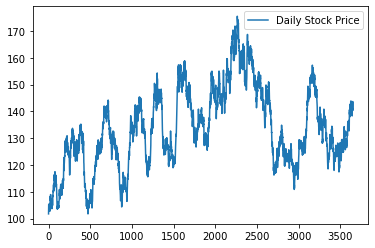

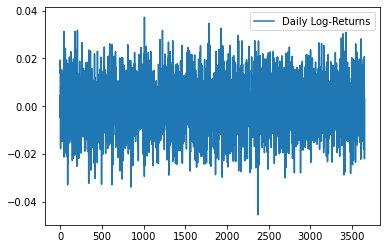

Annualized estimated mean log-return is 0.032634984609359347
Annualized estimated log-return std deviation is 0.20206652618172125


In [1]:
### problem 1

#(a)
import numpy as np

#(b)
import matplotlib.pyplot as plt

#(c)
#solve sde function first, then write its answer
mu = 0.06
sigma = 0.2
n = 365*10
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S = []
S0 = 100
S = S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz ))

#(d)
plt.plot(S, label='Daily Stock Price')
plt.legend()
plt.show()

#(e) 
logret = np.log(S[1:n]/S[0:n-1])

#(f)
plt.plot(logret, label='Daily Log-Returns')
plt.legend()
plt.show()

#(g) 
print('Annualized estimated mean log-return is', np.mean(logret)/dt)
print('Annualized estimated log-return std deviation is', np.std(logret)/np.sqrt(dt))

How many observations has your sample? 25933


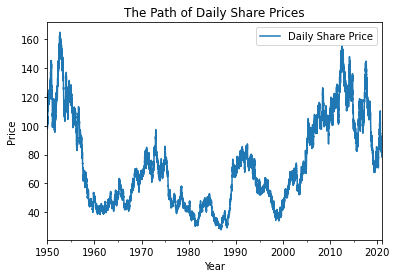

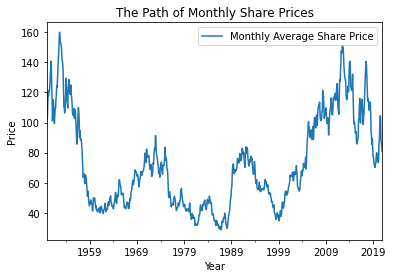

In [37]:
# problem 2

#(a)
import pandas as pd

#(b)
# reuse the function in problem 1
prng=pd.period_range('1950-01-01','2020-12-31',freq='D')

mu = 0.06
sigma = 0.20
n = len(prng)
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S0 = 100
S = pd.Series(S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz )),prng)
data = pd.DataFrame([1]*len(prng),index = prng, columns = ['S'])
data.S = S
#(c)
# 1.How many observations has your sample? 
n1=len(S)
print('How many observations has your sample?', n1)

# 2. Plot the path of daily share prices
S.plot(label='Daily Share Price')
plt.title('The Path of Daily Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

#(d) 
# by the hint, Use s.resample(rule) function
S_month = S.resample('M').mean()

#(e)
S_month.plot(label='Monthly Average Share Price')
plt.title('The Path of Monthly Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()


In [38]:
# problem 3

#(a) log returns
logret_day = np.log(S.values[1:n]/S.values[0:n-1])
logret_day = pd.Series(logret_day)


S_week_prices = S.resample('W', convention = 'start').first()
logret_week = np.log(S_week_prices.values[1:len(S_week_prices)]/S_week_prices.values[0:len(S_week_prices)-1])
logret_week = pd.Series(logret_week)

S_month_prices = S.resample('M', convention = 'start').first()
logret_month = np.log(S_month_prices.values[1:len(S_month_prices)]/S_month_prices.values[0:len(S_month_prices)-1])
logret_month = pd.Series(logret_month)

In [39]:
#(b) Summary statistics
#daily summary statistics
logret_day.describe()

count    25932.000000
mean        -0.000009
std          0.010519
min         -0.041263
25%         -0.007157
50%         -0.000046
75%          0.007099
max          0.041645
dtype: float64

In [40]:
#Weekly summary statistics
logret_week.describe()

count    3705.000000
mean       -0.000066
std         0.027529
min        -0.101958
25%        -0.018853
50%         0.000022
75%         0.018686
max         0.093881
dtype: float64

In [41]:
#Monthly summary statistics
logret_month.describe()

count    851.000000
mean      -0.000249
std        0.058369
min       -0.172007
25%       -0.042304
50%        0.002269
75%        0.039944
max        0.177755
dtype: float64

In [42]:
#(c) Annualized mean and standard deviation of log-returns
print(f"The annualized mean for daily log-returns is {np.mean(logret_day)*365} and the the annualized std is {np.std(logret_day)*np.sqrt(365)}")
print(f"The annualized mean for weekly log-returns is {np.mean(logret_week)*52} and the the annualized std is {np.std(logret_week)*np.sqrt(52)}")
print(f"The annualized mean for monthly log-returns is {np.mean(logret_month)*12} and the the annualized std is {np.std(logret_month)*np.sqrt(12)}")


The annualized mean for daily log-returns is -0.003318245537741273 and the the annualized std is 0.20096613988162013
The annualized mean for weekly log-returns is -0.0034214354699589047 and the the annualized std is 0.19849066888865485
The annualized mean for monthly log-returns is -0.00299145600359616 and the the annualized std is 0.20207902119162222


<AxesSubplot:title={'center':'Daily returns'}>

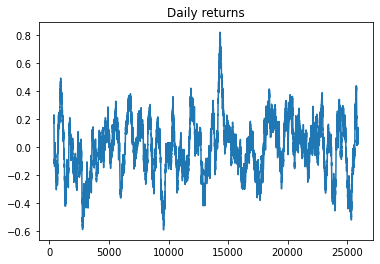

In [43]:
#(d) Visualize annualized mean and standard deviation of log-returns
(logret_day.rolling(window=365).mean()*365).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

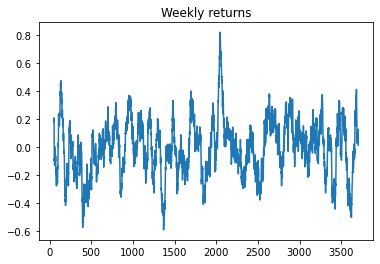

In [44]:
(logret_week.rolling(window=52).mean()*52).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

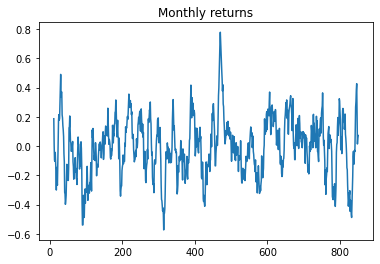

In [45]:
(logret_month.rolling(window=12).mean()*12).plot(title="Monthly returns")

<AxesSubplot:title={'center':'Daily returns'}>

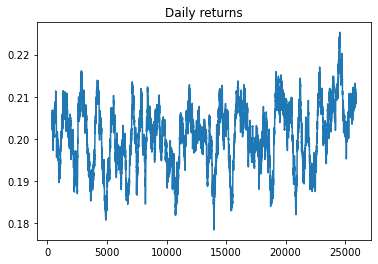

In [46]:
(logret_day.rolling(window=365).std()*np.sqrt(365)).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

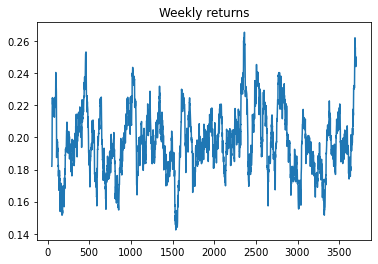

In [47]:
(logret_week.rolling(window=52).std()*np.sqrt(52)).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

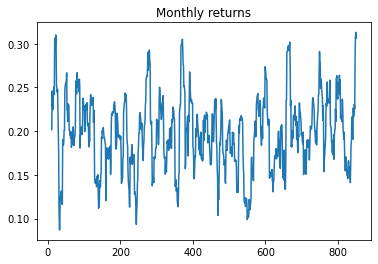

In [48]:
(logret_month.rolling(window=12).std()*np.sqrt(12)).plot(title="Monthly returns")

### (e) How does the historical variation in the annualized mean and standard deviation estimates compare across sampling frequencies?




The mean estimate does not vary accross frequencies, but its value is very noisy as is fluctuates a lot.

For the std we observe that when the timespan is shorter we obtain a more accurate estimator when we increase time we observe more noise for the estimate

In [49]:
#(f) Compare theoretical results

In [58]:
day = np.log(data.S/data.S.shift(1))

day_year = day.resample('A')
day_year_mean = day_year.mean()*365

day_squared = day * day
day_squared_year = day_squared.resample('A')
day_squared_year_var = day_squared_year.mean() * 365

month = data.resample('M',convention = 'start').first()
month = np.log(month.S/month.S.shift(1))
month_year_mean = month.resample('A').mean()*12
month_year_squared = month * month
month_year_var = month_year_squared.resample('A').mean()*12

In [63]:
print(f"The theoretical input values in our model are 0.06 for the mean and 0.04 for the variance")
print(f"The daily mean we obtain is {day_year_mean.mean()} and the associated variance is {day_year_mean.var()}")
print(f"The monthly mean is {month_year_mean.mean()} and the associated variance is {month_year_mean.var()} \n")

print(f"The theoretical daily variance value is {day_squared.mean()+0.04} and for its associated variance is {2*0.2**4/365+4*0.06**2*0.2**2/365**2} ")
print(f"The daily variance value we obtain is {day_squared_year_var.mean()} and for its associated variance is {day_squared_year_var.var()}")
print(f"The theoretical monthly variance value is {month_year_squared.mean()+0.04} and for its associated variance is {2*0.2**4/12+4*0.06**2*0.2**2/12**2}")
print(f"The monthly variance value we obtain is {month_year_var.mean()} and for its associated variance is {month_year_var.var()}")


The theoretical input values in our model are 0.06 for the mean and 0.04 for the variance
The daily mean we obtain is -0.0033544607858516516 and the associated variance is 0.030528837134146797
The monthly mean is -0.002600386338814334 and the associated variance is 0.030590313353099783 

The theoretical daily variance value is 0.040110650464507853 and for its associated variance is 8.771446800525429e-06 
The daily variance value we obtain is 0.04038694503517939 and for its associated variance is 7.901833880055783e-06
The theoretical monthly variance value is 0.043403056378320766 and for its associated variance is 0.0002706666666666667
The monthly variance value we obtain is 0.04082317885290908 and for its associated variance is 0.00027345199376148507


In [1]:
##Exercise 4

#(a)

import psycopg2
import wrds
import numpy as np
import matplotlib.pyplot as plt

db=wrds.Connection(wrds_username='zimushko')
#db.create_pgpass_file()

Loading library list...
Done


In [2]:
#(b) 
import pandas as pd

#getting data from wrds
apple=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (7) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
gs=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (35048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
msft=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (8048) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
pg=db.raw_sql("select  date, ret " "from crsp.dsf " "where permco in (21446) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")
ge=db.raw_sql("select date, ret " "from crsp.dsf " "where permco in (20792) " 
                "and date>='2001-01-01'" "and date<='2020-12-31'")

#rename the columns
apple=apple.rename(index=apple["date"], columns={"ret": "Apple"})
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})
msft=msft.rename(index=msft["date"], columns={"ret": "Msft"})
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})
ge=ge.rename(index=pg["date"], columns={"ret": "GE"})

#merge into one table
df1=pd.merge(apple, gs, on='date')
df2=pd.merge(df1, msft, on='date')
df3=pd.merge(df2, pg, on='date')
S=pd.merge(df3, ge, on='date')

In [3]:
#(c) 
S.to_csv('returns.csv', sep=';', index=False)

In [4]:
#(d) 
S = pd.read_csv('returns.csv', sep=';') 

In [5]:
#(e)

#changing the date format
S['date']=pd.to_datetime(S['date'], format='%Y-%m-%d')
S=S.set_index('date')

#obtaining gross cummulative returns 
S=S+1
S=S.cumprod()

#obtaining daily, weekly and monthly log returns
dailylogret = np.log(S).diff()
S1=S.resample('M').last()
S2=S.resample('W').last()
monthlylogret=np.log(S1).diff() 
weeklylogret=np.log(S2).diff()

In [6]:
#Summary statistics
dailylogret.describe()

,Apple,GS,Msft,PG,GE
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000
mean,0.001264,0.000240,0.000552,0.000359,-0.000156
std,0.023162,0.022619,0.018262,0.011856,0.021009
min,-0.197470,-0.210223,-0.159453,-0.091428,-0.164394
25%,-0.009673,-0.009835,-0.007784,-0.005021,-0.008495
50%,0.000950,0.000340,0.000380,0.000371,0.000000
75%,0.012616,0.010666,0.008924,0.005960,0.008370
max,0.130194,0.234818,0.170626,0.113409,0.179844


In [7]:
weeklylogret.describe()

,Apple,GS,Msft,PG,GE
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.006007,0.001086,0.002543,0.001778,-0.000828
std,0.048566,0.047977,0.035853,0.024249,0.044985
min,-0.278471,-0.365644,-0.202276,-0.175977,-0.228878
25%,-0.021420,-0.022785,-0.015779,-0.009548,-0.019237
50%,0.007949,0.003336,0.002363,0.002306,-0.000325
75%,0.034618,0.025478,0.021650,0.014688,0.020827
max,0.236207,0.393197,0.149357,0.122933,0.309399


In [8]:
monthlylogret.describe()

,Apple,GS,Msft,PG,GE
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.025052,0.004512,0.010189,0.007917,-0.003494
std,0.101977,0.086816,0.068223,0.042397,0.087692
min,-0.399818,-0.321603,-0.178358,-0.123464,-0.324090
25%,-0.032658,-0.051402,-0.035698,-0.018670,-0.045344
50%,0.040119,0.015279,0.018394,0.009023,-0.003726
75%,0.093091,0.055757,0.052848,0.034465,0.043256
max,0.301776,0.210329,0.222736,0.112685,0.316246


In [9]:
print('Annualized estimated mean daily log-return', dailylogret.mean()*252)

Annualized estimated mean daily log-return Apple    0.318647
GS       0.060402
Msft     0.139111
PG       0.090586
GE      -0.039333
dtype: float64


In [10]:
print('Annualized estimated mean weakly log-return ', weeklylogret.mean()*52)

Annualized estimated mean weakly log-return  Apple    0.312373
GS       0.056466
Msft     0.132257
PG       0.092480
GE      -0.043053
dtype: float64


In [11]:
print('Annualized estimated mean monthly log-return ', monthlylogret.mean()*12)

Annualized estimated mean monthly log-return  Apple    0.300622
GS       0.054148
Msft     0.122271
PG       0.095004
GE      -0.041923
dtype: float64


In [12]:
print('Annualized std deviation of daily log returns', np.std(dailylogret)*np.sqrt(252))

Annualized std deviation of daily log returns Apple    0.367651
GS       0.359035
Msft     0.289865
PG       0.188197
GE       0.333480
dtype: float64


In [13]:
print('Annualized std deviation of weekly log returns', np.std(weeklylogret)*np.sqrt(52))

Annualized std deviation of weekly log returns Apple    0.350049
GS       0.345802
Msft     0.258412
PG       0.174782
GE       0.324236
dtype: float64


In [14]:
print('Annualized std deviation of monthly log returns', np.std(monthlylogret)*np.sqrt(12))

Annualized std deviation of monthly log returns Apple    0.352517
GS       0.300109
Msft     0.235836
PG       0.146560
GE       0.303139
dtype: float64


Text(0.5, 1.0, 'Time-series of the annualized monthly logreturns estimated using a rolling one-year window')

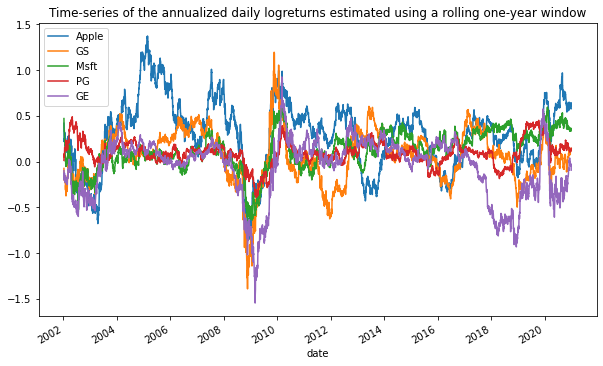

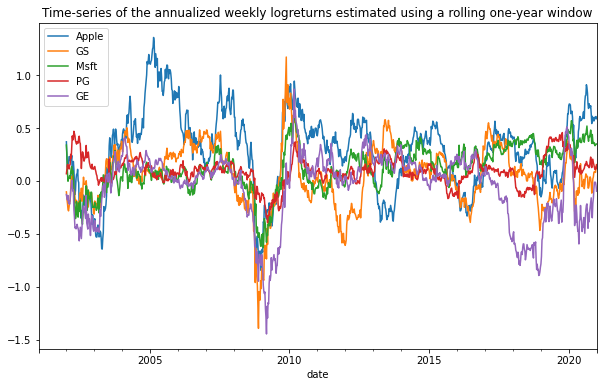

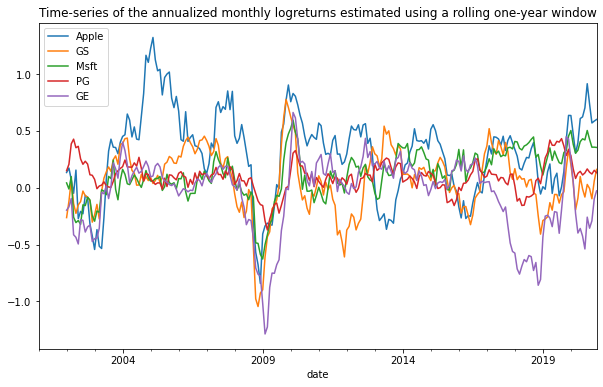

In [15]:
#Plotting the moving average of returns
(dailylogret.rolling(window =252).mean()*252).plot(figsize=(10,6))
plt.title('Time-series of the annualized daily logreturns estimated using a rolling one-year window')
(weeklylogret.rolling(window =52).mean()*52).plot(figsize=(10,6))
plt.title('Time-series of the annualized weekly logreturns estimated using a rolling one-year window')
(monthlylogret.rolling(window =12).mean()*12).plot(figsize=(10,6))
plt.title('Time-series of the annualized monthly logreturns estimated using a rolling one-year window')

Text(0.5, 1.0, 'Еime-series of the annualized std deviation of monthly logreturns estimated using a rolling one-year window')

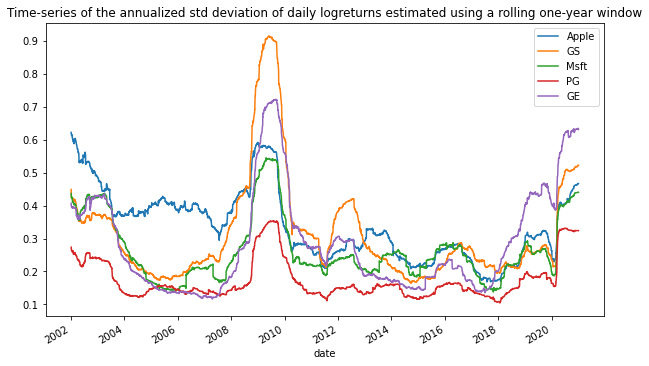

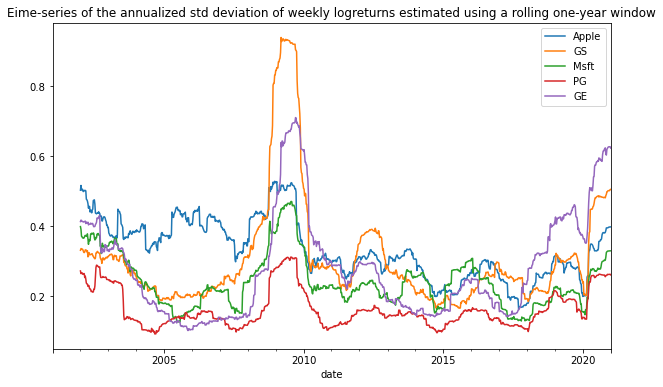

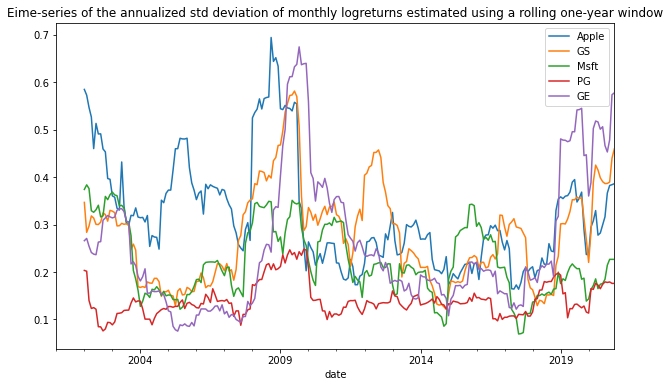

In [16]:
#Plotting the time-series of the std deviation of logreturns estimated using a rolling one-year window
(dailylogret.rolling(window = 252).std()*np.sqrt(252)).plot(figsize=(10,6))
plt.title('Time-series of the annualized std deviation of daily logreturns estimated using a rolling one-year window')
(weeklylogret.rolling(window = 52).std()*np.sqrt(52)).plot(figsize=(10,6))
plt.title('Еime-series of the annualized std deviation of weekly logreturns estimated using a rolling one-year window')
(monthlylogret.rolling(window = 12).std()*np.sqrt(12)).plot(figsize=(10,6))
plt.title('Еime-series of the annualized std deviation of monthly logreturns estimated using a rolling one-year window')

Excercise 4 (f)
--------------------------------------------------
Clearly, we can observe the decrease of the variation in mean returns and standard deviation estimates as the sampling frequency decreases. It can also be concluded that when the sampling frequency is decreased there is less noise in the estimations of the variation in mean returns and standard deviation. 

It can be observed that the variation in mean returns and standard deviation estimates is much higher in the real data rather than in the simulated data, meaning the estimation of these parameters can be more difficult. As for the standard deviation estimation, we can also see that the parameter has much higher values in the real data and it increases when the sampling frequency increases. The opposite pattern is observed in simulated data: the variation in standard deviation is decreasing when the frequency is increasing. It can be explained by the fact that for the simulated data the volatility parameter is considered to be constant and the variation of the parameter is inversely proportional to the number of observation. In the case of real data, the standard deviation is not constant and follows a random process like the stock price resulting in the higher variation.

Excercise 4 (g)
--------------------------------------------------

During the COVID Crisis we can observe that both the mean log-returns as well as standard deviation estimates go up, which is expected since there is higher volatility during the crisis period. The same volatility pattern can be observed during the Mortgage crisis that started in 2008, but it is also followed be the much lower, in comparison with Covid Crisis, returns.